#College Event Feedback Analysis
**Intern Name: Vibin Raj Date: Jan 28, 2026**

**Project Overview:** This project analyzes student feedback from recent campus events (Tech Fest, Hackathon, etc.) to understand satisfaction levels. By using Sentiment Analysis (NLP), we identified key areas for improvement in logistics and event planning.

**Key Findings:**

**Top Performing Event**: Career Seminar

**Lowest Performing Event**: Hackathon (due to "Wifi" and "Food" issues) and AI Workshop

**Overall Sentiment**: 55% Positive, 35% Negative.

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

##The Dataset is given below:

In [74]:
data={
    'Student_ID': [f'STU{i}' for i in range(101, 201)],
    'Event_Name':[random.choice(['Tech Fest', 'Cultural Night', 'AI Workshop', 'Career Seminar', 'Hackathon']) for _ in range(100)],
    'Department': [random.choice(['CSE','MECH','CIVIL','ECE','EEE','Industrial']) for _ in range(100)],
    'Rating': [random.choices([1,2,3,4,5],weights=[0.05, 0.1, 0.15, 0.4, 0.3])[0] for _ in range(100)],
    'Comments': [
        random.choice([
            "Amazing experience! learned a lot.",
            "The speaker was very knowledgeable.",
            "Too crowded and hot.",
            "Great food but the event started late.",
            "The wifi was terrible during the event.",
            "Loved the cultural performances!",
            "Boring and too long.",
            "Well organized, kudos to the team.",
            "Not what I expected, waste of time.",
            "Hands-on session was very helpful.",
            "The venue was spacious and comfortable.",
            "Great networking opportunities with seniors.",
            "The guest speaker was incredibly inspiring.",
            "Perfectly managed, everything was on time.",
            "The swag bags and merchandise were cool!",
            "High-quality content, very relevant to my course.",
            "Best event of the semester so far.",
            "The microphone kept cutting out, couldn't hear.",
            "Registration took forever, missed the start.",
            "Ran out of food before I could get any.",
            "The room was freezing cold.",
            "Complete chaos, nobody knew where to go.",
            "The presentation was too technical and confusing.",
            "Chairs were uncomfortable for such a long session.",
            "Good topic, but the session dragged on too long.",
            "Great speakers, but the venue was too small.",
            "Interesting, but not what was advertised.",
            "The food was good, but the lines were huge.",
            "Content was basic, expected something more advanced."
        ]) for _ in range(100)
        ]
}
df=pd.DataFrame(data)
df.to_csv('student_feedback.csv',index=False)
print('Dataset created successfully!\n')
df.head(20)

Dataset created successfully!



,Student_ID,Event_Name,Department,Rating,Comments
0,STU101,Career Seminar,Industrial,2,The venue was spacious and comfortable.
1,STU102,Career Seminar,EEE,5,"Interesting, but not what was advertised."
2,STU103,Cultural Night,Industrial,4,Loved the cultural performances!
3,STU104,AI Workshop,EEE,5,"Complete chaos, nobody knew where to go."
4,STU105,Career Seminar,CIVIL,4,The guest speaker was incredibly inspiring.
5,STU106,Hackathon,Industrial,4,"Interesting, but not what was advertised."
6,STU107,Hackathon,CIVIL,4,Too crowded and hot.
7,STU108,AI Workshop,MECH,3,Too crowded and hot.
8,STU109,AI Workshop,ECE,5,Boring and too long.
9,STU110,Career Seminar,ECE,4,Boring and too long.


In [75]:
from textblob import TextBlob
def get_sentiment(text):
  negative_triggers = ['crowded', 'hot', 'late', 'bad', 'terrible', 'boring', 'noisy', 'mess', 'chaos', 'waste', 'slow']

  for word in negative_triggers:
      if word in text.lower():
          return 'Negative'

  analysis=TextBlob(text)
  if analysis.sentiment.polarity>=0.10:
    return 'Positive'
  elif (analysis.sentiment.polarity>-0.10 and analysis.sentiment.polarity<0.10):
    return 'Neutral'
  else:
    return 'Negative'

df['Sentiment']=df['Comments'].apply(get_sentiment)
df.head()

,Student_ID,Event_Name,Department,Rating,Comments,Sentiment
0,STU101,Career Seminar,Industrial,2,The venue was spacious and comfortable.,Positive
1,STU102,Career Seminar,EEE,5,"Interesting, but not what was advertised.",Positive
2,STU103,Cultural Night,Industrial,4,Loved the cultural performances!,Positive
3,STU104,AI Workshop,EEE,5,"Complete chaos, nobody knew where to go.",Negative
4,STU105,Career Seminar,CIVIL,4,The guest speaker was incredibly inspiring.,Positive


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student_ID  100 non-null    object
 1   Event_Name  100 non-null    object
 2   Department  100 non-null    object
 3   Rating      100 non-null    int64 
 4   Comments    100 non-null    object
 5   Sentiment   100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [77]:
df.describe(include='all')

,Student_ID,Event_Name,Department,Rating,Comments,Sentiment
count,100,100,100,100.000000,100,100
unique,100,5,6,NaN,28,3
top,STU101,Hackathon,ECE,NaN,Boring and too long.,Positive
freq,1,24,19,NaN,7,55
mean,NaN,NaN,NaN,3.730000,NaN,NaN
std,NaN,NaN,NaN,1.179411,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,5.000000,NaN,NaN


## 1. Event Satisfaction Overview

In [78]:
# Average Rating per Event
avg_ratings = df.groupby('Event_Name')['Rating'].mean().sort_values(ascending=False)
avg_ratings

,Rating
Event_Name,
Career Seminar,3.857143
AI Workshop,3.833333
Cultural Night,3.782609
Hackathon,3.625000
Tech Fest,3.500000


/tmp/ipython-input-4292634015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')


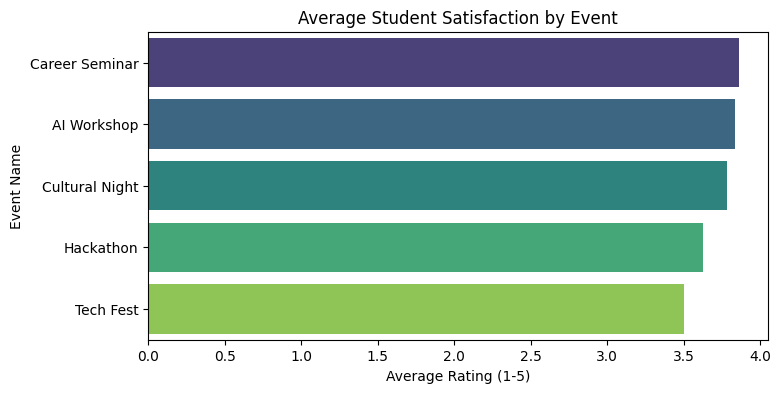

In [79]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')
plt.title('Average Student Satisfaction by Event')
plt.ylabel('Event Name')
plt.xlabel('Average Rating (1-5)')
plt.show()

In [80]:
# Departments with highest avg rating
best_departments=df.groupby('Department')['Rating'].mean().sort_values(ascending=False)
best_departments

,Rating
Department,
Industrial,3.928571
CSE,3.888889
EEE,3.888889
CIVIL,3.733333
ECE,3.631579
MECH,3.312500


## 2. Sentiment Breakdown

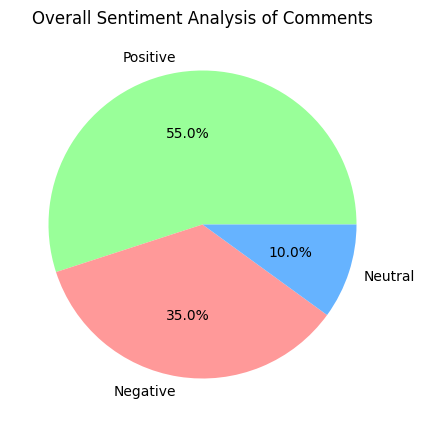

In [81]:
# Sentiment Distribution
plt.figure(figsize=(5, 5))
sentiment_counts = df['Sentiment'].value_counts()
color_map = {'Positive': '#99ff99', 'Neutral': '#66b3ff', 'Negative': '#ff9999'}
my_colors = [color_map[label] for label in sentiment_counts.index]

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=my_colors)
plt.title('Overall Sentiment Analysis of Comments')
plt.show()

In [82]:
# Most Loved Event
Loved=df[df['Sentiment']=='Positive']
Loved_Event=Loved.groupby('Event_Name')['Sentiment'].count().sort_values(ascending=False)
Loved_Event

,Sentiment
Event_Name,
Cultural Night,14
Hackathon,14
Career Seminar,12
AI Workshop,8
Tech Fest,7


In [83]:
# Most Hated Event
Hated=df[df['Sentiment']=='Negative']
Hated_Event=Hated.groupby('Event_Name')['Sentiment'].count().sort_values(ascending=False)
Hated_Event

,Sentiment
Event_Name,
AI Workshop,9
Hackathon,9
Career Seminar,8
Cultural Night,5
Tech Fest,4


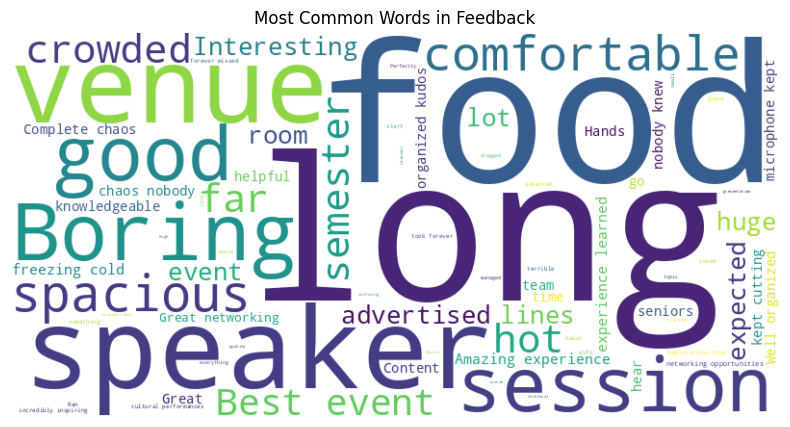

In [84]:
# Word Cloud of Comments
all_comments = " ".join(df['Comments'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Feedback')
plt.show()

## 3. Deep Dive: What went wrong?

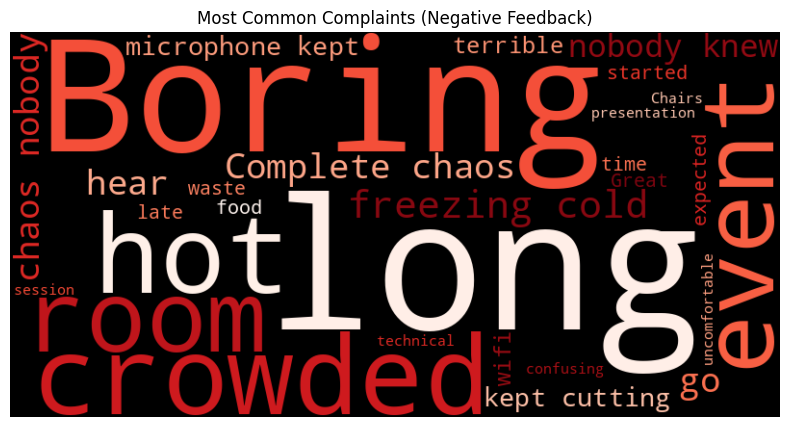

In [85]:
# Word Cloud of NEGATIVE Comments
neg_comments = " ".join(df[df['Sentiment'] == 'Negative']['Comments'])

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Complaints (Negative Feedback)')
plt.show()

## Recommendations for Event Organizers Based on the data, here are three concrete steps to improve future events:

**Fix the Basics:** The most common negative keywords were "long","boring",Crowded" and "Hot." Future events need larger venues or better ventilation.

**Tech Check is Mandatory:** The Hackathon received low scores due to "Wifi" issues. A dedicated network test 24 hours prior is recommended.

**Strict Schedule:** "Late" was a frequent complaint. We suggest a 15-minute buffer between sessions to keep the agenda on track.